<table class="ee-notebook-buttons" align="left"><td>
<a target="_blank"  href="https://colab.research.google.com/github/biagiominio/Remote_sensing_2021/blob/main/R_code_classification.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" /> Run in Google Colab</a>
</td><td>
<a target="_blank"  href="https://github.com/biagiominio/Remote_sensing_2021/blob/main/R_code_classification.ipynb"><img width=32px src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" /> View source on GitHub</a></td></table>

## Install R packages
The [install.packages](https://www.rdocumentation.org/packages/utils/versions/3.6.2/topics/install.packages) function is used to download and install packages from CRAN-like repositories.
To install multiple packages at the same time, you define a vector that contains the names of the packages to be installed.
The [raster](https://) package defines classes and methods for spatial raster data access and manipulation. The [rasterVis](https://) package complements raster providing a set of methods for enhanced visualization and interaction.
The [rgdal](https://www.rdocumentation.org/packages/rgdal/versions/1.5-23) package provides links to the [GDAL](https://gdal.org/) library (Geospatial Data Abstraction Library) and access to projection/transformation operations from the "PROJ" library.


In [ ]:
packages <- c("raster", "RStoolbox")
install.packages(packages)

The [library](https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/library) function is used to load previously installed packages.
Using the [lapply](https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/lapply) function we simultaneously apply the `library()` function to all elements of the vector containing the packages.

In [ ]:
lapply(packages , library, character.only = TRUE)

In [73]:
download.file("https://www.esa.int/var/esa/storage/images/esa_multimedia/images/2020/07/solar_orbiter_s_first_views_of_the_sun4/22133246-1-eng-GB/Solar_Orbiter_s_first_views_of_the_Sun.jpg", "Solar_Orbiter.jpg")

## Reading spatial data
To read and view a multilevel object it is common to use the [brick](https://www.rdocumentation.org/packages/raster/versions/3.4-5/topics/brick) function (RasterBrick object). 
Explore the properties of the `solar_orbiter` object.

In [74]:
solar_orbiter <- brick("Solar_Orbiter.jpg")
solar_orbiter

class      : RasterBrick 
dimensions : 2150, 3567, 7669050, 3  (nrow, ncol, ncell, nlayers)
resolution : 1, 1  (x, y)
extent     : 0, 3567, 0, 2150  (xmin, xmax, ymin, ymax)
crs        : NA 
source     : /content/Solar_Orbiter.jpg 
names      : Solar_Orbiter.1, Solar_Orbiter.2, Solar_Orbiter.3 
min values :               0,               0,               0 
max values :             255,             255,             255 


## Visualization of spatial data
Several generic functions have been implemented for "raster" objects to create maps and other plot types. For example, use [plot](https://www.rdocumentation.org/packages/raster/versions/3.4-5/topics/plot) function to create a map of a raster object. Using the [par](https://www.rdocumentation.org/packages/graphics/versions/3.6.2/topics/par) function it is possible to set the parameters of the graphic output and create a multi frame of images.

### Multi-temporal images
Individual bands can be combined into a single image by assigning individual layers or bands to one of the three color channels (red, green and blue). 
The [plotRGB](https://www.rdocumentation.org/packages/raster/versions/3.4-5/topics/plotRGB) function can be used to make "true (or false) color images" from multi-band satellite images.
In this case, the resulting color tone in the image will be linked to the combination of the different LST values for the years assigned to the three RGB bands.
For example, we assign the year 2005 to the red band (R = 2), the year 2010 to the green band (G = 3) and the year 2015 to the blue band (B = 4). In the image, all those areas with temperature values for 2015 that are higher than the other two time levels (2005 and 2010) will appear with shades of blue.


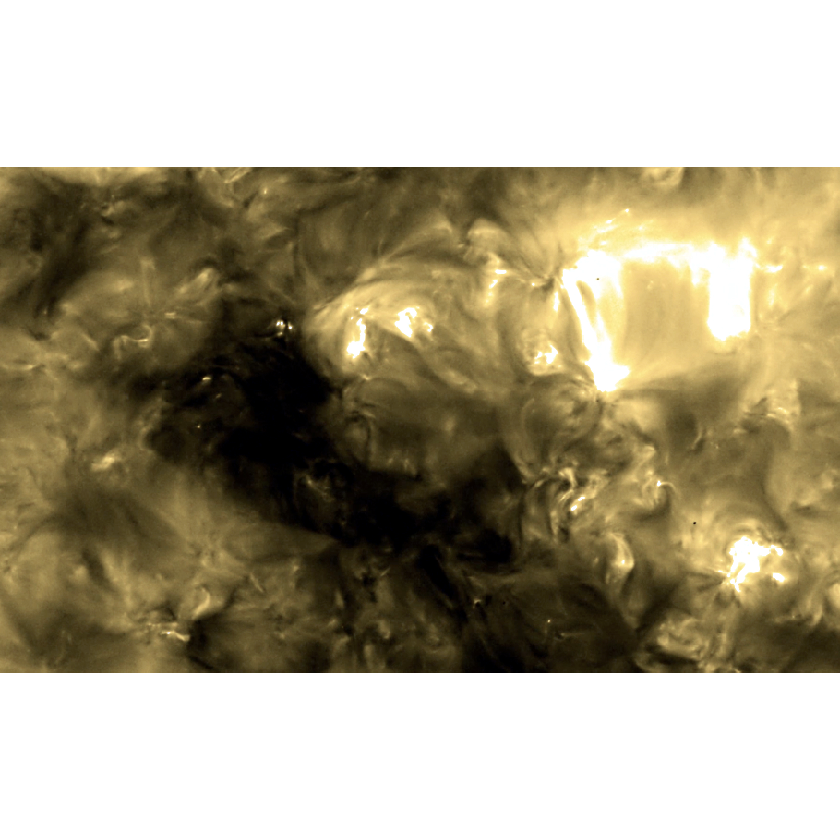

In [75]:
plotRGB(solar_orbiter, 1,2,3, stretch="lin")

### Colour change
Use function [colorRampPalette](https://www.rdocumentation.org/packages/dichromat/versions/1.1/topics/colorRampPalette) to create a continuous color scale divided into n-levels.

In [76]:
cl <- colorRampPalette(c('yellow','black','red'))(300)

### K-means
* seed.save
* dev.off

In [ ]:
solar_orbiter_class3 <- unsuperClass(solar_orbiter, nClasses=3)
plot(solar_orbiter_class$map)

In [77]:
solar_orbiter_class5 <- unsuperClass(solar_orbiter, nClasses=5)

In [79]:
pdf(file = '/content/my_plot.pdf')
plot(solar_orbiter_class5$map, col=cl, axes= FALSE)
dev.off()

png 
  2

Download Solar Orbiter data and proceed further!
Grand Canyon
https://landsat.visibleearth.nasa.gov/view.php?id=80948
When John Wesley Powell led an expedition down the Colorado River and through the Grand Canyon in 1869,

In [49]:
download.file("https://eoimages.gsfc.nasa.gov/images/imagerecords/80000/80948/dolansprings_oli_2013088_canyon_lrg.jpg", "Grand_Canyon.jpg")

In [ ]:
gc <- brick("Grand_Canyon.jpg")
plotRGB(gc, r=1, g=2, b=3, stretch="lin")

In [ ]:
plotRGB(gc, r=1, g=2, b=3, stretch="hist")

In [52]:
gcc2 <- unsuperClass(gc, nClasses=2)
gcc2

unsuperClass results

*************** Map ******************
$map
class      : RasterLayer 
dimensions : 6222, 9334, 58076148  (nrow, ncol, ncell)
resolution : 1, 1  (x, y)
extent     : 0, 9334, 0, 6222  (xmin, xmax, ymin, ymax)
crs        : NA 
source     : /tmp/Rtmp5RSuXH/raster/r_tmp_2021-04-27_202033_59_75894.grd 
names      : layer 
values     : 1, 2  (min, max)


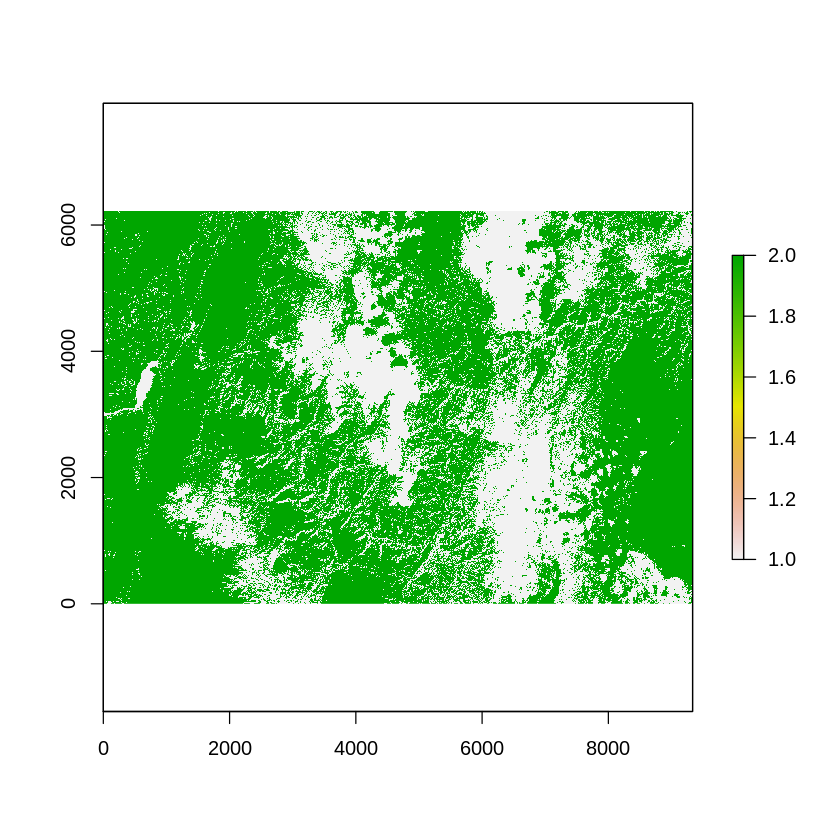

In [62]:
plot(gcc2$map)

In [ ]:
gcc4 <- unsuperClass(gc, nClasses=4)
plot(gcc4$map)